In [3]:
%matplotlib inline
import pandas
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from astropy.io import ascii
from astropy.table import Table, Column
import lightkurve
import emcee
import batman
from lightkurve.lightcurve import LightCurve
from ldtk import (LDPSetCreator,BoxcarFilter)
from ldtk.filters import kepler
import os

In [17]:
os.chdir('/Users/willwaalkes/Desktop/PhD_Thesis/TFOP/Analysis/')

TOI = 2094.01
data = pandas.read_csv('Data/TOI2094_27px.csv')
params = pandas.read_csv('Data/TESS_Objects.csv',comment='#')

In [18]:
TOIs = params['TOI']
TIC_ID = params['TIC_ID']

In [19]:
for i in range(len(TOIs)):
    if TOIs[i] == TOI:
        index = i

observatory = 'APO'
print(f'TIC {TIC_ID[index]}')
print(f'TOI {TOI}')

TIC 356016119.0
TOI 2094.01


In [20]:
BJD = data['BJD_TDB']
times = np.array(BJD)
offset = int(times[0])
times = times-offset

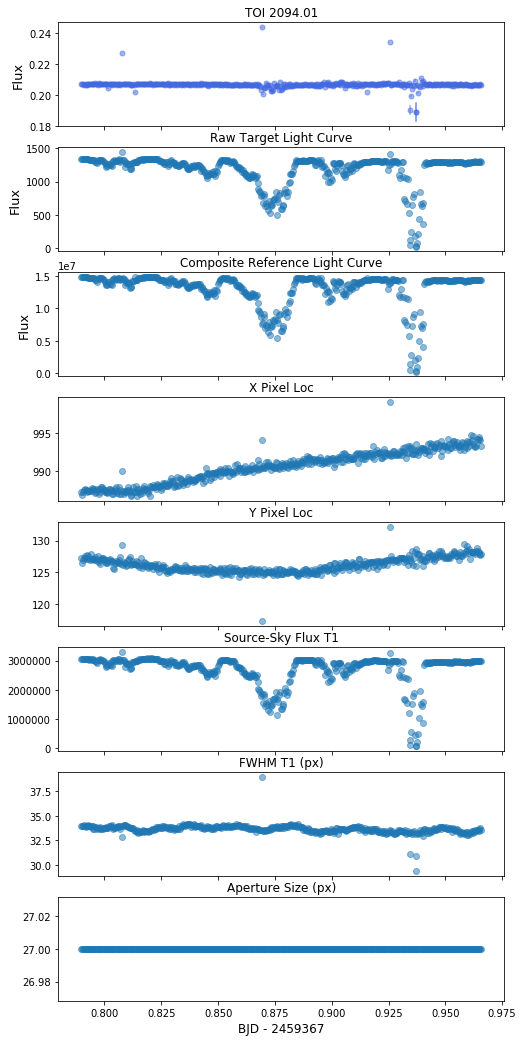

In [32]:
f, (a0, a1, a2,a3,a4,a5,a6,a7) = plt.subplots(8,1,figsize=(8,18),sharex=True)

a0.set_title(f'TOI {TOI}')
a0.set_ylabel('Flux',fontsize=13)
a0.errorbar(times,data['rel_flux_T1'],yerr=data['rel_flux_err_T1'],
            fmt='o',alpha=0.5,color='royalblue',markersize='5')

a1.set_title('Raw Target Light Curve')
a1.set_ylabel('Flux',fontsize=13)
a1.scatter(times,data['Mean_T1'],alpha=0.5)

a2.set_title('Composite Reference Light Curve')
a2.set_ylabel('Flux',fontsize=13)
a2.scatter(times,data['tot_C_cnts'],alpha=0.5)

a3.set_title('X Pixel Loc')
a3.scatter(times,data['X(IJ)_T1'],alpha=0.5)

a4.set_title('Y Pixel Loc')
a4.scatter(times,data['Y(IJ)_T1'],alpha=0.5)

a5.set_title('Source-Sky Flux T1')
a5.scatter(times,data['Source-Sky_T1'],alpha=0.5)

a6.set_title('FWHM T1 (px)')
a6.scatter(times,data['FWHM_T1'],alpha=0.5)

a7.set_title('Aperture Size (px)')
a7.scatter(times,data['Source_Radius'],alpha=0.5)
a7.set_xlabel('BJD - '+str(offset),fontsize=12)

plt.savefig(f'Figs/TOI{TOI}_diagnostics.pdf')
plt.show()

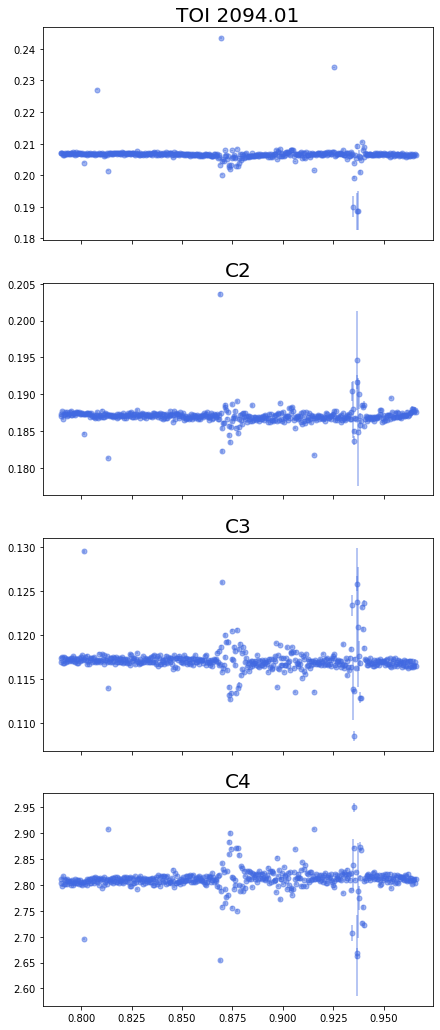

In [33]:
f, (a0, a1, a2, a3) = plt.subplots(4,1,figsize=(7,18),sharex=True)

a0.set_title(f'TOI {TOI}',fontsize=20)
a0.errorbar(times,data['rel_flux_T1'],yerr=data['rel_flux_err_T1'],
            fmt='o',alpha=0.5,color='royalblue',
            markersize='5')
a1.set_title(f'C2',fontsize=20)
a1.errorbar(times,data['rel_flux_C2'],yerr=data['rel_flux_err_C2'],
            fmt='o',alpha=0.5,color='royalblue',
            markersize='5')
a2.set_title('C3',fontsize=20)
a2.errorbar(times,data['rel_flux_C3'],yerr=data['rel_flux_err_C3'],
            fmt='o',alpha=0.5,color='royalblue',
            markersize='5')
a3.set_title(f'C4',fontsize=20)
a3.errorbar(times,data['rel_flux_C4'],yerr=data['rel_flux_err_C4'],
            fmt='o',alpha=0.5,color='royalblue',
            markersize='5')

plt.savefig(f'Figs/TOI{TOI}_relativereferences.pdf')

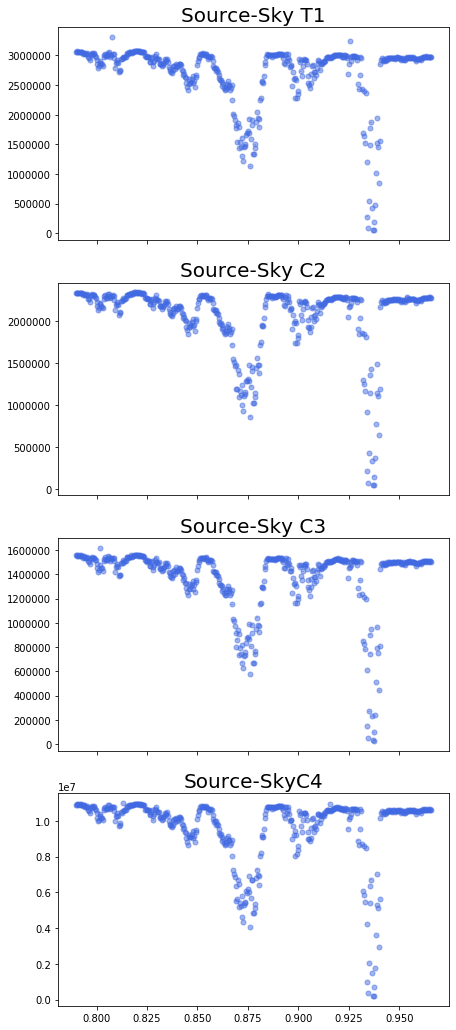

In [34]:
f, (a0, a1, a2, a3) = plt.subplots(4,1,figsize=(7,18),sharex=True)

a0.set_title('Source-Sky T1',fontsize=20)
a0.errorbar(times,data['Source-Sky_T1'],yerr=data['Source_Error_T1'],
            fmt='o',alpha=0.5,color='royalblue',
            markersize='5')
a1.set_title('Source-Sky C2',fontsize=20)
a1.errorbar(times,data['Source-Sky_C2'],yerr=data['Source_Error_C2'],
            fmt='o',alpha=0.5,color='royalblue',
            markersize='5')
a2.set_title('Source-Sky C3',fontsize=20)
a2.errorbar(times,data['Source-Sky_C3'],yerr=data['Source_Error_C3'],
            fmt='o',alpha=0.5,color='royalblue',
            markersize='5')
a3.set_title('Source-SkyC4',fontsize=20)
a3.errorbar(times,data['Source-Sky_C4'],yerr=data['Source_Error_C4'],
            fmt='o',alpha=0.5,color='royalblue',
            markersize='5')


plt.savefig('Figs/TOI2094_rawlightcurves.pdf')